# Twitter dogs rating

## Data wrangling 

### gathering

In [1]:
import pandas as pd 
import numpy as np
import requests
import os
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('twitter-archive-enhanced.csv')
pd.options.display.max_colwidth = 200

df.sample(5)



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744225525762/photo/1,5,10,Dave,None,None,None,None
1600,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper has a magical eye. 11/10 I can't stop looking at it https://t.co/heAGpKTpPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916130873345/photo/1,11,10,None,None,None,pupper,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He's out here bustin h*ckin ghosts. 13/10 dedicated af https://t.co/Ap477GhwXt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302385262592/photo/1,13,10,Tucker,None,None,None,None
2043,671536543010570240,NaN,NaN,2015-12-01 03:49:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reginald. He's pondering what life would be like without so much damn skin. 9/10 it'll be ok buddy https://t.co/1U5Ro5FA4c,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671536543010570240/photo/1,9,10,Reginald,None,None,None,None
1721,680130881361686529,NaN,NaN,2015-12-24 21:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reggie. His Santa hat is a little big. 10/10 he's still having fun https://t.co/w0dcGXq7qK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680130881361686529/photo/1,10,10,Reggie,None,None,None,None


In [3]:
#downloading the file programmatically 
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
with open("image-predictions.tsv",mode = 'wb') as file:
    file.write(response.content)
    

In [4]:
df_img=pd.read_csv('image-predictions.tsv',sep='\t')
df_img.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1578,796149749086875649,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,Tibetan_mastiff,0.915790,True,German_shepherd,0.062480,True,Leonberg,0.008297,True
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,tennis_ball,0.176495,False,badger,0.059905,False,Norwegian_elkhound,0.056850,True
1304,753294487569522689,https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg,1,chow,0.194773,True,monitor,0.102305,False,Siberian_husky,0.086855,True
1566,793962221541933056,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
938,703631701117943808,https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg,2,window_shade,0.909533,False,window_screen,0.011427,False,brass,0.008882,False


### downloading tweet-json.txt

In [5]:
URL_json = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
file_name = 'tweet-json.txt'

#import urllib.request, json 
#with urllib.request.urlopen(URL_json) as url:
 #   data = json.loads(url.read().decode())

#response2 = requests.get(URL_json)
#with open(file_name,mode = 'wb') as file2:
 #   file2.write(response.content)

In [6]:
import json
tweets = []
for line in open(file_name, 'r'):
    tweets.append(json.loads(line))

#### could not get a twitter developer account so i just read from the given json txt file

In [7]:
#import tweepy
#from tweepy import OAuthHandler
#import json
"""
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
 #       count += 1
 #       print(str(count) + ": " + str(tweet_id))
 #       try:
 #           tweet = api.get_status(tweet_id, tweet_mode='extended')
 #           print("Success")
 #           json.dump(tweet._json, outfile)
 #           outfile.write('\n')
 #       except tweepy.TweepError as e:
 #           print("Fail")
 #           fails_dict[tweet_id] = e
 #           pass
#end = timer()
#print(end - start)
#print(fails_dict)
"""


'\n#from timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\n#consumer_key = \'HIDDEN\'\n#consumer_secret = \'HIDDEN\'\n#access_token = \'HIDDEN\'\n#access_secret = \'HIDDEN\'\n\n#auth = OAuthHandler(consumer_key, consumer_secret)\n#auth.set_access_token(access_token, access_secret)\n\n#api = tweepy.API(auth, wait_on_rate_limit=True)\n\n\n#tweet_ids = df_1.tweet_id.values\n#len(tweet_ids)\n\n#Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\n#count = 0\n#fails_dict = {}\n#start = timer()\n#Save each tweet\'s returned JSON as a new line in a .txt file\n#with open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n #   for tweet_id in tweet_ids:\n #       count += 1\n #       print(str(count) + ": " + str(tweet_id))\n #       try:\n #       

In [8]:
tweets[0]['favorite_count'],tweets[0]['id'],tweets[0]['retweet_count']


(39467, 892420643555336193, 8853)

In [9]:
count = []
for t in tweets:
    ID = t['id']
    fav_count = t['favorite_count']
    retweet = t['retweet_count']
    
    count.append({'ID':ID,
                'favourite_count': fav_count,
                  'retweet_count': retweet})
    

df_tweets = pd.DataFrame(count,columns = ['ID','favourite_count','retweet_count'])

In [10]:
df_tweets.head(10)

,ID,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


### Assesing

### Tweet Archive Assesing

In [11]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [13]:
df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1187,718460005985447936,NaN,NaN,2016-04-08 15:26:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Bowie. He's listening for underground squirrels. Smart af. Left eye is considerably magical. 9/10 would so pet https://t.co/JyNmyjy3fe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718460005985447936/photo/1,9,10,Bowie,None,None,None,None


In [14]:
df.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689        

In [15]:
df.shape

(2356, 17)

In [16]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
df.rating_numerator.unique()# there a huge number numerator as 1776,666,420,960,etc

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [18]:
df.rating_denominator.unique()# there a huge number numerator as 150,170,130,etc

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [19]:
df[df.expanded_urls.duplicated(keep= False)].sort_values(by= 'expanded_urls')#retweet duplictes 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_ra...",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_ra...",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tim

In [20]:
df['name'].value_counts()#most od names are none and that apper visualy 

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Daisy           7
an              7
Bailey          7
Buddy           7
Toby            7
Bella           6
Stanley         6
Dave            6
Scout           6
Milo            6
Oscar           6
Jack            6
Jax             6
Leo             6
Koda            6
Rusty           6
Oakley          5
             ... 
Harnold         1
Pilot           1
Mona            1
Smiley          1
Izzy            1
Mookie          1
Edd             1
Ole             1
Pluto           1
Christoper      1
Rufio           1
Venti           1
Dewey           1
Rontu           1
Lilli           1
Kloey           1
Cermet          1
Colin           1
Cilantro        1
Bode            1
Tayzie          1
Vinscent        1
Cupid           1
Lucia           1
Craig     

1740	822489057087389700	https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg	1	Samoyed	0.416769	True	malamute	0.252706	True	kuvasz	0.157028	True
1742	822647212903690241	https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg	1	Samoyed	0.416769	True	malamute	0.252706	True	kuvasz	0.157028	True

In [21]:
df[df["tweet_id"]==822489057087389700]## isuues releated to expanded_urls

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
417,822489057087389700,NaN,NaN,2017-01-20 17:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/822489057087389700/photo/1,https://twitter.com/dog_rates/status/822489057087389700/photo/1,https://twitter.com/dog_rates/status/822489057087389700/photo/1",13,10,Paisley,None,None,None,None


In [22]:
df[df["tweet_id"]==822647212903690241]# isues reletes to retweetss and multi link in same link 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
415,822647212903690241,NaN,NaN,2017-01-21 03:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E,8.224891e+17,4.196984e+09,2017-01-20 17:00:46 +0000,"https://twitter.com/dog_rates/status/822489057087389700/photo/1,https://twitter.com/dog_rates/status/822489057087389700/photo/1,https://twitter.com/dog_rates/status/822489057087389700/photo/1,http...",13,10,Paisley,None,None,None,None


In [23]:
df[df.expanded_urls.duplicated(keep=False)].sort_values(by ='expanded_urls')
#repeted row for the retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_ra...",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_ra...",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tim

 ### tweets  assesing

In [24]:
df_tweets.head()

,ID,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [25]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
ID                 2354 non-null int64
favourite_count    2354 non-null int64
retweet_count      2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
df_tweets['retweet_count'].max()

79515

In [27]:
df_tweets[df_tweets['retweet_count']==79515]#this data might be outdate as the are arshived not from api 

,ID,favourite_count,retweet_count
1037,744234799360020481,131075,79515


In [28]:
df[df["tweet_id"]==744234799360020481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,doggo,None,None,None


### Image Prediction Assesing 

In [29]:
df_img.head()#the columns they are ambiguous names

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
df_img.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1141,729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/729838572744912896/pu/img/RIl-XYmRxW-YLFSV.jpg,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
427,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,1,Eskimo_dog,0.615741,True,Siberian_husky,0.199544,True,malamute,0.179107,True
1598,799297110730567681,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,malamute,0.985028,True,Siberian_husky,0.005834,True,Eskimo_dog,0.005443,True
1553,793165685325201412,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,1,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False


In [31]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
df_img[df_img.jpg_url.duplicated(keep= False)].sort_values(by= 'jpg_url')#the dupliciate jpg_url is refet=ring to the retweet and there no idea and making predtion to same post

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [33]:
df_img.describe()#it apper that the 5-Q for prediction model 2,3 make them under-perfromance 

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Assesing Observation 

## quality
### tweet archive
- tag is include in the url "remove the tag" 
- expanded_urls multi img links for same rating post in df_img
- tweet_ID should be a string in every dataframe
- in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id and 
    retweeted_status_user_id is to be removed 
    
- wrong data type for timestamp
- last five columns in archive data describing the dog stage and name is supposed to be nulls not none
- Errors in the naming of the dogs some such names like 'me,not,one,very ,the ,this,etc',officaly which might have been a problem with the csv itself due to wrong extraction  

### image predaction 
 - rename columns for the img predauction as they are ambiguous names
 - when joing tables we would not join retweets 
 - drop production model 2,3 as thier coffi are less accuret than 1

#### Tidiness
Column headers are values, not variable names.

Multiple variables are stored in one column.

Variables are stored in both rows and columns.

Multiple types of observational units are stored in the same table.

A single observational unit is stored in multiple tables.

- Information about one type of observational unit (tweets) is spread across three different dataframes. Therefore, these three dataframes should be merged as they are part of the same observational unit.

- dog "stage" is untidy"Column headers are values, not variable names."there are 4 columns describing the dog stage which it should be clearly only one colun 
- expanded_urls there is more than one link leading to the same website kepping one link and removing the rest should be ideal
	

# Cleaning

In [34]:

df_clean = df.copy()
df_img_clean = df_img.copy()
df_tweets_clean =df_tweets.copy()


In [35]:
df_tweets_clean = df_tweets_clean.rename(columns = {'ID':'tweet_id'})
df_tweets_clean

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


### Tidiness issue


### Quality  issues



#### define:
- remove retweets and duplicated extended links
#### code

In [36]:
indices  = df_clean[df_clean.expanded_urls.duplicated(keep= 'last')].index
indices

Int64Index([  30,   55,   64,   68,   73,   74,   91,   97,  109,  113,
            ...
            1774, 1819, 1844, 1895, 1905, 1914, 1940, 2038, 2149, 2189],
           dtype='int64', length=137)

In [37]:
df_clean.drop(inplace = True,axis = 0 ,index = indices)

In [38]:
df_clean.shape

(2219, 17)

In [39]:
#df_clean = pd.melt(df_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                      #'timestamp', 'source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_time_stamp','expanded_urls','rating_numerator','rating_denominator','name']
                          # ,var_name='dog stage', value_name='dose')
        
df_clean[df_clean.expanded_urls.duplicated(keep = False)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2219 non-null int64
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2219 non-null object
source                        2219 non-null object
text                          2219 non-null object
retweeted_status_id           102 non-null float64
retweeted_status_user_id      102 non-null float64
retweeted_status_timestamp    102 non-null object
expanded_urls                 2218 non-null object
rating_numerator              2219 non-null int64
rating_denominator            2219 non-null int64
name                          2219 non-null object
doggo                         2219 non-null object
floofer                       2219 non-null object
pupper                        2219 non-null object
puppo                         2219 non-null object
dtypes: float64(4), int64(3), ob

In [40]:
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull() == True]
df_clean = df_clean[df_clean['retweeted_status_id'].isnull() == True]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2093 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2093 non-null object
source                        2093 non-null object
text                          2093 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2093 non-null int64
rating_denominator            2093 non-null int64
name                          2093 non-null object
doggo                         2093 non-null object
floofer                       2093 non-null object
pupper                        2093 non-null object
puppo                         2093 non-null object
dtypes: float64(4), int64(3), object(10)

In [41]:
#df_clean[df_clean.expanded_urls.duplicated(keep = False)].sort_values(by ='expanded_urls')
df_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True,axis=1)

#### test

In [42]:
df_clean.shape

(2093, 12)

In [43]:
df.shape

(2356, 17)

# Tidiness issue
### Define
- replace the last four columns with one catagorical 

In [44]:
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [45]:
df_clean.stage.value_counts(),16, 18, 17, 17, 19,19,18,20


(NoneNoneNoneNone        1758
 NoneNonepupperNone       220
 doggoNoneNoneNone         72
 NoneNoneNonepuppo         23
 doggoNonepupperNone        9
 NoneflooferNoneNone        9
 doggoflooferNoneNone       1
 doggoNoneNonepuppo         1
 Name: stage, dtype: int64, 16, 18, 17, 17, 19, 19, 18, 20)

In [46]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,NoneNoneNoneNone


In [47]:
##### len(smth),len('NoneNonepupperNone'),len('doggoNoneNoneNone'),len('NoneNoneNonepuppo'),len('doggoflooferNoneNone')

def fun6(s):
    #all none case
    if(len(s) == 16):
        return s[0:4]
    #two cases
    elif(len(s) == 17):#doggoNoneNoneNone'
        if(s[0:5] == 'doggo'):
            return s[0:5]
        elif(s[12:17] == 'puppo'):#NoneNoneNonepuppo
            return s[12:17]
    #two cases with length of 18
    elif(len(s) == 18):
        
        #NoneNonepupperNone
        if (s[8:14] == 'pupper'):
            return s[8:14]
        
        #doggoNoneNonepuppo
        elif(s[0:4] != 'None'):
            return s[0:5]+','+s[13:19]
        
    elif(len(s) == 19):
        #doggo,pupper
        if(s[0:5] == 'doggo'):
            return s[0:5]+','+s[9:15]
        #floofer
        elif(s[4:11] == 'floofer'):
            return s[4:11]
        
        
        #doggo + , floofer
    elif(len(s) == 20):
        return s[0:5] + ',' + s[5:12]
      
        

       

In [48]:
df_clean.stage = df_clean.stage.apply(fun6)
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,None


In [49]:

columns = ['name','doggo','floofer','pupper','puppo','stage']
for c in columns: 
    df_clean[c].replace("None",np.nan,inplace = True)
    
        

In [50]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
114,870656317836468226,2017-06-02 15:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cody. He zoomed too aggressively and tore his ACL. Happens to the best of us. Still 13/10\n\nHelp Cody here: https://t.co/4hxnDOt1CV https://t.co/42ryYRQ2Q4,"https://www.gofundme.com/help-fix-codys-torn-acl,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com/dog_rates/status/870656317836468226/photo/1,https://twitter.com...",13,10,Cody,NaN,NaN,NaN,NaN,NaN
1704,680889648562991104,2015-12-26 23:15:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cheesy. It's her birthday. She's patiently waiting to eat her party muffin. 9/10 happy birthday pup https://t.co/cH2H7mch2H,https://twitter.com/dog_rates/status/680889648562991104/photo/1,9,10,Cheesy,NaN,NaN,NaN,NaN,NaN
143,864197398364647424,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr,"https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,http...",13,10,Paisley,NaN,NaN,NaN,NaN,NaN
104,872261713294495745,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa,"https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1",13,10,Harry,NaN,NaN,NaN,NaN,NaN
275,840696689258311684,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin https://t.co/2gclc1MNr7,https://twitter.com/dog_rates/status/840696689258311684/photo/1,10,10,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [52]:
df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], 
    inplace = True, axis = 1)


### test : check if the columns got dropped

In [53]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


#### test : running some queries to see whether the fun6 worked or not

In [54]:
#NoneNoneNoneNone        
#NoneNonepupperNone       
#doggoNoneNoneNone         
#NoneNoneNonepuppo         
#doggoNonepupperNone        
#NoneflooferNoneNone        
#doggoflooferNoneNone       
#doggoNoneNonepuppo

df_clean.query('stage == "doggo,puppo"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,"doggo,puppo"



#### define:
- change time stamp to date/time variable


#### code: 

In [55]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)


#### test:

In [56]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN


In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null int64
rating_denominator    2093 non-null int64
name                  1494 non-null object
stage                 335 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.5+ KB


## define: 
- some ratings in the numerator are wrong

#### code:

In [58]:
#\d+ means one or more digit to the right
#extracting all the numbers and points
ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_clean.rating_numerator = ratings


#### test


In [59]:
df_clean.query('tweet_id == "786709082849828864"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN


## define 
- source has the name tag


#### code:

In [60]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [61]:
s = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
s[s.find('>')+1:-4]

'Twitter for iPhone'

In [62]:
def fun2(s):
    return s[s.find('>')+1:-4]

df_clean.source = df_clean.source.apply(fun2)

#### test:

In [63]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN


In [64]:
df_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

## Define 
- changing the tweet_id to string

In [65]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)
df_tweets_clean.tweet_id=df_tweets_clean.tweet_id.astype(str)

In [66]:
#df_clean.tweet_id = df_clean.tweet_id.astype(str)
#df_img.tweet_id = df_img.tweet_id.astype(str)
#change ID to tweet_id


In [67]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### test

In [68]:
df_tweets_clean.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2093 non-null object
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null object
rating_denominator    2093 non-null int64
name                  1494 non-null object
stage                 335 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 163.5+ KB


In [70]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN


In [71]:
df_tweets_clean.tweet_id.dtypes

dtype('O')

In [72]:
df_img.tweet_id.dtypes

dtype('int64')

## define: wrong dog names

In [73]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


## define : some expanded urls lead to the same website 
- sol : we could take only one link using the split method

#### code:

In [74]:
def fun3(u):
    return u.split(',')[0]

In [75]:
col = df_clean.expanded_urls.apply(fun3)

#### test:

In [76]:
df_clean.expanded_urls = df_clean.expanded_urls.apply(fun3)

In [77]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1151,725842289046749185,2016-04-29 00:21:01,Twitter for iPhone,This is Colby. He's currently regretting all those times he shook your hand for an extra treat. 12/10 https://t.co/vtVHtKFtBH,https://twitter.com/dog_rates/status/725842289046749185/photo/1,12,10,Colby,NaN
1688,681523177663676416,2015-12-28 17:12:42,Twitter for iPhone,This is Carly. She's actually 2 dogs fused together. Very innovative. Probably has superpowers. 12/10 for double dog https://t.co/GQn2IopLud,https://twitter.com/dog_rates/status/681523177663676416/photo/1,12,10,Carly,NaN
1526,690374419777196032,2016-01-22 03:24:22,Twitter for iPhone,This is Phred. He's an Albanian Flepperkush. Tongue is rather impressive if I'm honest. Perhaps even legendary 11/10 https://t.co/VpfFCKE28C,https://twitter.com/dog_rates/status/690374419777196032/photo/1,11,10,Phred,NaN
1268,709556954897764353,2016-03-15 01:48:55,Twitter for iPhone,This is Cecil. She's a Gigglefloof Poofer. Outdoorsy af. One with nature. 12/10 would strategically capture https://t.co/ijJB0DuOIC,https://twitter.com/dog_rates/status/709556954897764353/photo/1,12,10,Cecil,NaN
1980,672975131468300288,2015-12-05 03:05:49,Twitter for iPhone,This is Chuckles. He is one skeptical pupper. 10/10 stay woke Chuckles https://t.co/ZlcF0TIRW1,https://twitter.com/dog_rates/status/672975131468300288/photo/1,10,10,Chuckles,pupper


### image predictions :
#### define: drop the other two predictions


#### code:

In [78]:
df_img.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [79]:
df_img_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [80]:
df_img_clean = df_img_clean.iloc[:,0:6]

In [81]:
df_img_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


#### define : rename the columns

In [82]:
df_img_clean = df_img_clean.rename(columns={'p1':'prediction_breed','p1_conf':'accuracy','p1_dog':'is_dog'})

In [83]:

df_img_clean.head(2)

,tweet_id,jpg_url,img_num,prediction_breed,accuracy,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


# Tidiness issue
## define : merging the three tables 


#### code:

In [84]:
df_tweets_clean.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [85]:
twitter_archive_master = pd.merge(df_clean, df_img_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

#### test :


In [86]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,prediction_breed,accuracy,is_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True


In [87]:
#the predections df starts from the first of august 
#so we the increase in null values only matched after the first of august
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null object
rating_denominator    1971 non-null int64
name                  1447 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
prediction_breed      1971 non-null object
accuracy              1971 non-null float64
is_dog                1971 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 217.5+ KB


In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2093 non-null object
timestamp             2093 non-null datetime64[ns]
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null object
rating_denominator    2093 non-null int64
name                  1494 non-null object
stage                 335 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 163.5+ KB


#### merging the retweet and favourites count :



In [89]:
twitter_archive_master = pd.merge(twitter_archive_master, df_tweets_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [90]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,prediction_breed,accuracy,is_dog,favourite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,41048,9774


#### TEST

In [91]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null object
rating_denominator    1971 non-null int64
name                  1447 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
prediction_breed      1971 non-null object
accuracy              1971 non-null float64
is_dog                1971 non-null bool
favourite_count       1971 non-null int64
retweet_count         1971 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(9)
memory usage: 248.3+ KB


#### define: wrong names like 'an','quite'
clearly the algorithm is a little buggy of how the dogs where named since it finds the string "this is ---"
and selects the third index and assumes that this is the right name.However this would not work with vowel names 
because the third word would be 'an' as it got selected,Besides there are also cases where the algorithm selects the 
word 'a' or 'quite' from the tweet's text,making a new algorithm to get the dog's name would work but in this case 
making the algorithm would not be possible because in these posts the dog's name is not actually mentioned instead 
the post gets sarcastic for example in index 756 the text says 'this is an iraqi speed' or 'this is an east african seal'

In [92]:
twitter_archive_master.query('name == "an"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,prediction_breed,accuracy,is_dog,favourite_count,retweet_count
756,746369468511756288,2016-06-24 15:48:42,Twitter for iPhone,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9,10,an,NaN,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,6637,1854
1055,703041949650034688,2016-02-26 02:20:37,Twitter for iPhone,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10,10,an,NaN,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,False,28996,14198
1823,668636665813057536,2015-11-23 03:46:18,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,https://twitter.com/dog_rates/status/668636665813057536/photo/1,10,10,an,NaN,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,1114,528
1948,666337882303524864,2015-11-16 19:31:45,Twitter for iPhone,This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,https://twitter.com/dog_rates/status/666337882303524864/photo/1,9,10,an,NaN,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,204,96
1950,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,152,71
1964,666051853826850816,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,NaN,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,1253,879


### Define :Make Rate colunm


### code:

In [93]:
twitter_archive_master['rating_denominator']=twitter_archive_master['rating_denominator'].astype(float)
twitter_archive_master['rating_numerator']=twitter_archive_master['rating_numerator'].astype(float)
twitter_archive_master['Rate']=twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']
twitter_archive_master.drop(columns = ['rating_numerator','rating_denominator'],inplace=True,axis=1)

In [94]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
tweet_id            1971 non-null object
timestamp           1971 non-null datetime64[ns]
source              1971 non-null object
text                1971 non-null object
expanded_urls       1971 non-null object
name                1447 non-null object
stage               303 non-null object
jpg_url             1971 non-null object
img_num             1971 non-null int64
prediction_breed    1971 non-null object
accuracy            1971 non-null float64
is_dog              1971 non-null bool
favourite_count     1971 non-null int64
retweet_count       1971 non-null int64
Rate                1971 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 232.9+ KB


# storing the clean csvs

In [95]:
df_clean.to_csv('tweet_archive_clean.csv')
df_tweets_clean.to_csv('tweet_count.csv')
df_img_clean.to_csv('clean_image_predictons.csv')
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Exploration

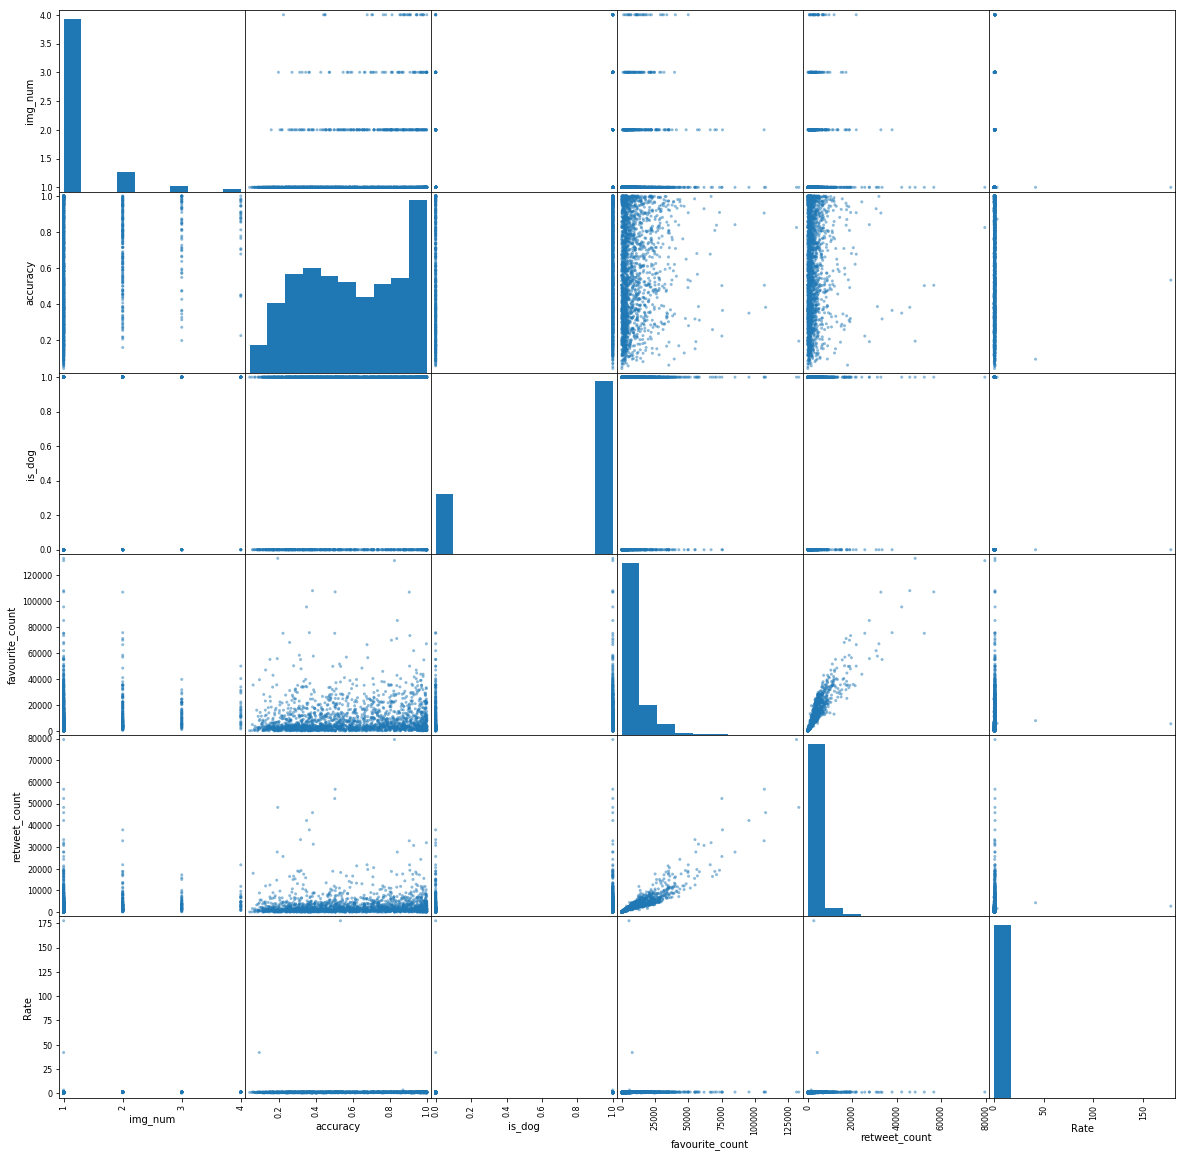

In [96]:
pd.plotting.scatter_matrix(twitter_archive_master,figsize =(20,20));

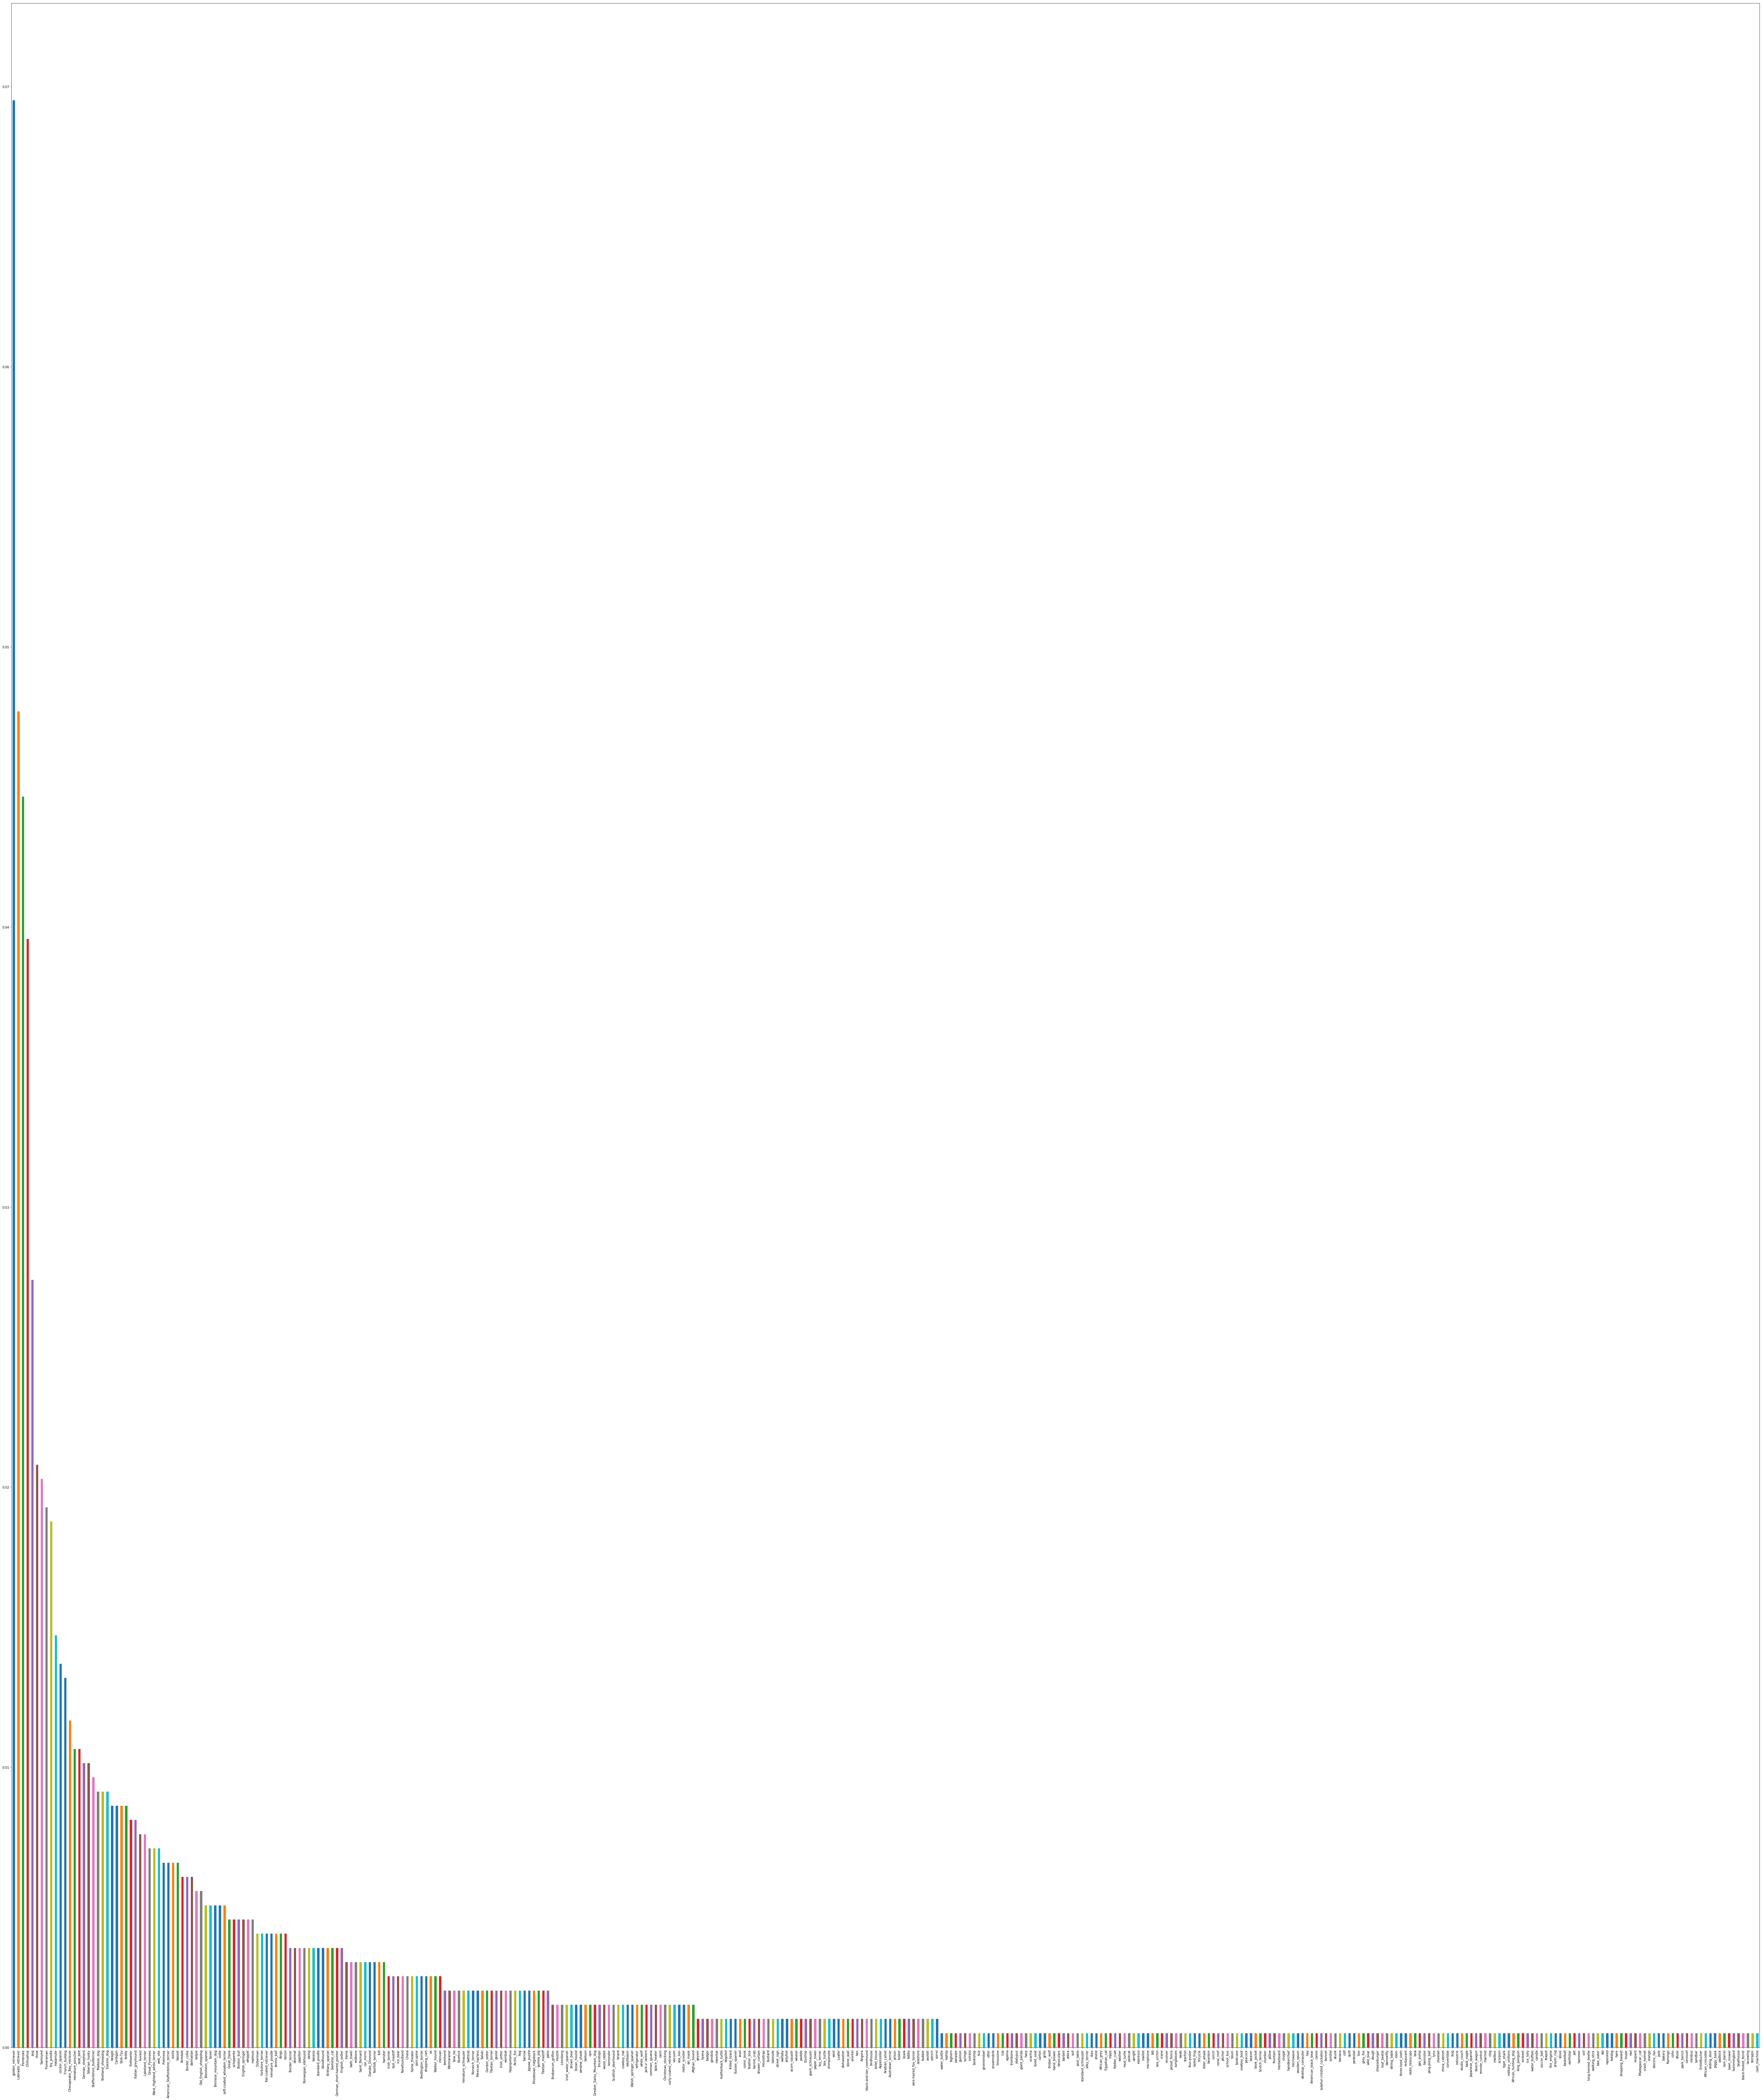

In [97]:
breed_percentage =twitter_archive_master.prediction_breed.value_counts()/twitter_archive_master.shape[0]
breed_percentage.plot(kind ='bar',figsize=(100,120))

In [98]:
breed_percentage
#golden_retriever               0.069508
#Labrador_retriever             0.047692
#Pembroke                       0.044647
#Chihuahua                      0.039574
#pug                            0.027397
#chow                           0.020802
#Samoyed                        0.020294
#Pomeranian                     0.019280
#toy_poodle                     0.018772
#malamute                       0.014713


golden_retriever             0.069508
Labrador_retriever           0.047692
Pembroke                     0.044647
Chihuahua                    0.039574
pug                          0.027397
chow                         0.020802
Samoyed                      0.020294
Pomeranian                   0.019280
toy_poodle                   0.018772
malamute                     0.014713
cocker_spaniel               0.013699
French_bulldog               0.013191
Chesapeake_Bay_retriever     0.011669
miniature_pinscher           0.010654
seat_belt                    0.010654
German_shepherd              0.010147
Siberian_husky               0.010147
Staffordshire_bullterrier    0.009640
Maltese_dog                  0.009132
Shetland_sheepdog            0.009132
Eskimo_dog                   0.009132
beagle                       0.008625
Cardigan                     0.008625
Shih-Tzu                     0.008625
teddy                        0.008625
Rottweiler                   0.008118
Italian_grey

#### golden_retrievers and labrador retrievers are the most common

In [99]:
twitter_archive_master.prediction_breed.value_counts()

golden_retriever             137
Labrador_retriever            94
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            21
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        17
Cardigan                      17
Shih-Tzu                      17
teddy                         17
Rottweiler                    16
Italian_greyhound             16
kuvasz                        15
Lakeland_terrier              15
Great_Pyrenees                14
          

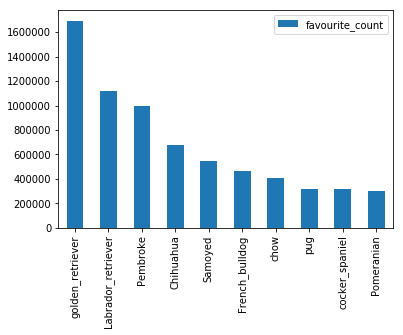

In [108]:
#fav_breed.plot(kind = 'bar')
fav = twitter_archive_master.groupby('prediction_breed').favourite_count.sum().reset_index().sort_values(by='favourite_count',ascending = False)  
#top10 favourite
fav = fav[0:10]
axis = list(fav['prediction_breed'])
#x = list(fav_breed['percentage'])
y = list(fav['favourite_count'])
fav2 =  pd.DataFrame({'favourite_count': y}, index= axis)
fav2.plot(kind = 'bar')

In [101]:
twitter_archive_master.drop(axis=0,index=[722],inplace=True)

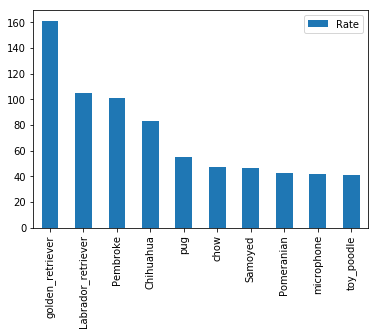

In [102]:
fav = twitter_archive_master.groupby('prediction_breed').Rate.sum().reset_index().sort_values(by='Rate',ascending = False)  
#top10 favourite
fav = fav[0:10]
axis = list(fav['prediction_breed'])
#x = list(fav_breed['percentage'])
y = list(fav['Rate'])
fav2 =  pd.DataFrame({'Rate': y}, index= axis)
fav2.plot(kind = 'bar')

In [103]:
twitter_archive_master[twitter_archive_master['prediction_breed']=='bow_tie']#tweet_Id:749981277374128128 index=722 is conceder rating outlire + plus prediction model mistake the dog with bow_tie
twitter_archive_master[twitter_archive_master['prediction_breed']=='bow_tie']
#itterble process

,tweet_id,timestamp,source,text,expanded_urls,name,stage,jpg_url,img_num,prediction_breed,accuracy,is_dog,favourite_count,retweet_count,Rate
795,740365076218183684,2016-06-08 02:09:24,Twitter for iPhone,When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85,https://twitter.com/dog_rates/status/740365076218183684/photo/1,NaN,NaN,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,1,bow_tie,0.246313,False,2727,495,1.0
1143,694905863685980160,2016-02-03 15:30:43,Twitter for iPhone,This is Archie. He's a Bisquick Taj Mapaw. Too many people are touching him. It is doing him a discomfort. 10/10 https://t.co/CJJpjTMzPQ,https://twitter.com/dog_rates/status/694905863685980160/photo/1,Archie,NaN,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,3046,1053,1.0
1740,670420569653809152,2015-11-28 01:54:54,Twitter for iPhone,This is Damon. The newest presidential candidate for 2016. 10/10 he gets my vote https://t.co/Z5nqlfjYJi,https://twitter.com/dog_rates/status/670420569653809152/photo/1,Damon,NaN,https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg,1,bow_tie,0.268759,False,668,342,1.0



## insights:
- most common dogs : golden and labrador retrievers
- dogs with the most ratings : golden and labrador retreivers
- correlation between retweets and favourites : as shown in the scatter matrix both retweets and favourites and positevly correlated
- correleation between dog breeds and favourites

# Draft

In [104]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1970
Data columns (total 15 columns):
tweet_id            1970 non-null object
timestamp           1970 non-null datetime64[ns]
source              1970 non-null object
text                1970 non-null object
expanded_urls       1970 non-null object
name                1446 non-null object
stage               303 non-null object
jpg_url             1970 non-null object
img_num             1970 non-null int64
prediction_breed    1970 non-null object
accuracy            1970 non-null float64
is_dog              1970 non-null bool
favourite_count     1970 non-null int64
retweet_count       1970 non-null int64
Rate                1970 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 232.8+ KB


In [105]:
df1=twitter_archive_master.copy()

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1970
Data columns (total 15 columns):
tweet_id            1970 non-null object
timestamp           1970 non-null datetime64[ns]
source              1970 non-null object
text                1970 non-null object
expanded_urls       1970 non-null object
name                1446 non-null object
stage               303 non-null object
jpg_url             1970 non-null object
img_num             1970 non-null int64
prediction_breed    1970 non-null object
accuracy            1970 non-null float64
is_dog              1970 non-null bool
favourite_count     1970 non-null int64
retweet_count       1970 non-null int64
Rate                1970 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 232.8+ KB


In [107]:
df1['rating_denominator']=df1['rating_denominator'].astype(float)
df1['rating_numerator']=df1['rating_numerator'].astype(float)
df1['rate']=df1['rating_numerator']/df1['rating_denominator']

KeyError: 'rating_denominator'

In [ ]:

df1['rate']=df1['rating_numerator']/df1['rating_denominator']

In [ ]:
df1

In [ ]:
#df_melt=df.copy()

In [ ]:

#columns = ['name','doggo','floofer','pupper','puppo']
#for c in columns: 
#    df_melt[c].replace("None",np.nan,inplace = True)
    

In [ ]:
#df1=pd.melt(df_melt,id_vars=["tweet_id","in_reply_to_status_id","in_reply_to_user_id","timestamp",'source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'])

In [ ]:
#df1[df1['value']=="pupper"]

In [ ]:
#df1[df1['tweet_id']==892420643555336193]

In [ ]:
#df2=df_melt.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != "NaN" ).sum(axis=1) > 1]


In [ ]:
#def fun4(val):
#    if(val == 'NaN'):    
#        return np.NaN
#    else:
#        return val

        
    

In [ ]:
#df1['variable']=df1['value'].apply(fun4)

In [ ]:
#df1.drop_duplicates(inplace =True)

In [ ]:
#df1[df1['tweet_id']==886366144734445568]

In [ ]:
#df1[df1['tweet_id']==855851453814013952]

In [ ]:
#df1.variable.value_counts()

In [ ]:
#frames = [df1,df2]
#result = pd.concat(frames)

In [ ]:
#result[result['tweet_id']==855851453814013952]

In [ ]:

#result.loc[result.variable == 'doggopupper', 'variable'] = 'doggo,pupper'
#result.loc[result.variable == 'doggopuppo', 'variable'] = 'doggo,puppo'
#result.loc[result.variable == 'doggofloofer', 'variable'] = 'doggo,floofer'

In [ ]:
#result[result['tweet_id']==855851453814013952]

In [ ]:
#result.info()

In [ ]:
#df2=df1.query('variable == value')
#twitter_archive_master = pd.merge(df_clean, df_img_clean, left_on='tweet_id', right_on='tweet_id', how='inner')


#if one tweet does not have a nan return it


#if a tweet has two values and a bunch of nans return both
#dog_stages = ['doggo','pupper','floofer','puppo']

#def fun5(id,var):
 #   if(var == np.NaN):


#df1.groupby('tweet_id')
#for index, row in df1.iterrows():
 #       pre_tweet_id = row['tweet_id']
        


In [ ]:
#df2.variable.value_counts()

In [ ]:
#df2

In [ ]:
#ids=list(df2['tweet_id'])
#ids

In [ ]:
#ida =df1.tweet_id.isin(ids).index
#len(ida)

In [ ]:
#ids.isin(df1.tweet_id).index


In [ ]:
#df1.drop(axis=0,index=ida,inplace=True)

In [ ]:
#df1[df1['tweet_id']==886366144734445568]

In [ ]:
#df1.info()